In [9]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from PIL import Image
import random

In [10]:
# Define folder paths for training and testing data
folder_benign_train = 'benign_train'
folder_malignant_train = 'malignant_train'

folder_benign_test = 'benign_test'
folder_malignant_test = 'malignant_test'

In [11]:
# Function to read and convert images to arrays
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [12]:
# Load training images for benign class and convert them to an array
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')

# Load training images for malignant class and convert them to an array
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load testing images for benign class and convert them to an array
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')

# Load testing images for malignant class and convert them to an array
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [13]:
# Create labels for training data (0 for benign, 1 for malignant)
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])

# Create labels for testing data (0 for benign, 1 for malignant)
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [14]:
# Merge training data and labels
X_train = np.concatenate((X_benign, X_malignant), axis=0)
y_train = np.concatenate((y_benign, y_malignant), axis=0)

# Merge testing data and labels
X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

In [15]:
# Shuffle training data and labels
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

# Shuffle testing data and labels
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

In [ ]:
# Shuffle data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

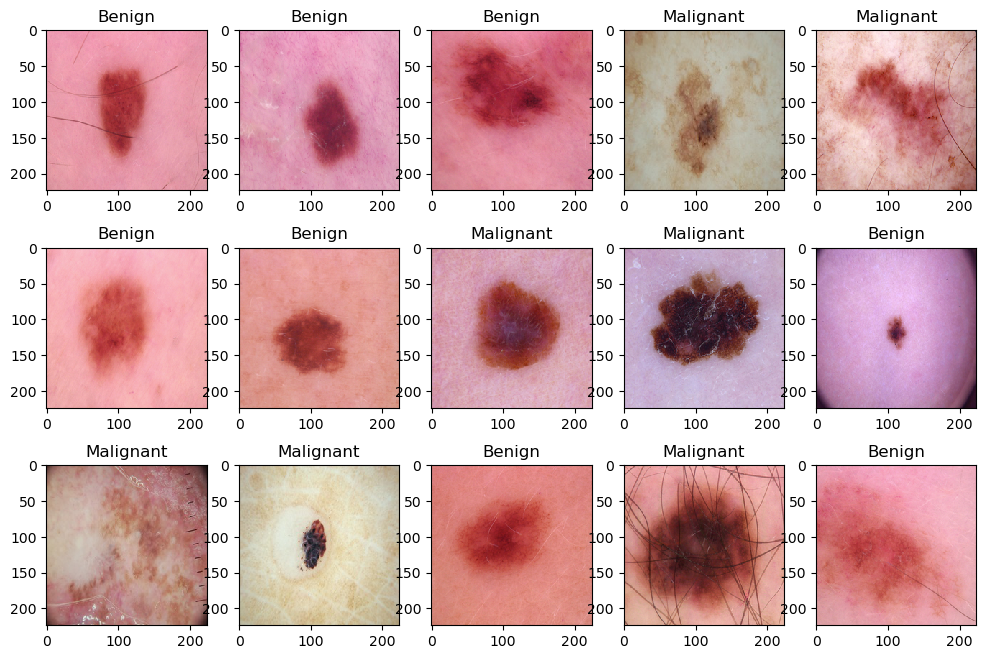

In [16]:
# Display the first 15 images of moles and their corresponding labels
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns * rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

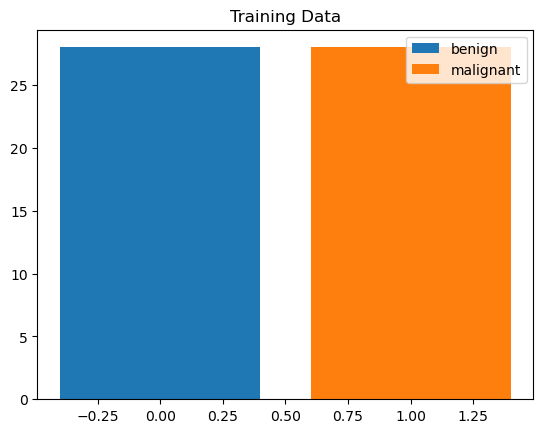

In [17]:
# Plot the distribution of classes in the training data
plt.bar(0, y_train[np.where(y_train == 0)].shape[0], label='benign')
plt.bar(1, y_train[np.where(y_train == 1)].shape[0], label='malignant')
plt.legend()
plt.title("Training Data")
plt.show()

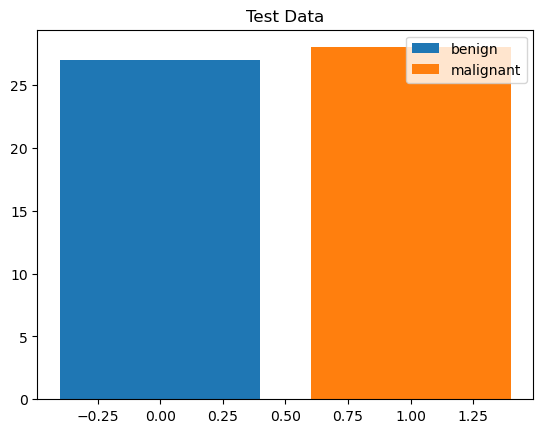

In [18]:
# Plot the distribution of classes in the testing data
plt.bar(0, y_test[np.where(y_test == 0)].shape[0], label='benign')
plt.bar(1, y_test[np.where(y_test == 1)].shape[0], label='malignant')
plt.legend()
plt.title("Test Data")
plt.show()

In [19]:
# Normalize the image data by dividing by 255 (pixel intensity range)
X_train = X_train / 255
X_test = X_test / 255

In [20]:
# Train an SVM model using polynomial kernel with different random seeds and select the best performing model
best_seed = 0
best_acc = 0
for i in range(101):
    model = SVC(random_state=i, kernel='poly')
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
    if accuracy_score(y_test, y_pred) > best_acc:
        best_seed = i
        best_acc = accuracy_score(y_test, y_pred)

In [21]:
# Print the best random seed and corresponding accuracy achieved
print(best_seed)
print(best_acc)

0
0.7090909090909091


In [22]:
# Train a new SVM model using polynomial kernel with the best random seed
new_model = SVC(kernel='poly', random_state=0)
new_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

SVC(kernel='poly', random_state=0)

In [23]:
# Evaluate the accuracy of the new model on the test data
y_pred = new_model.predict(X_test.reshape(X_test.shape[0], -1))
print(accuracy_score(y_test, y_pred))

0.7090909090909091


In [24]:
# Function to predict the class of an input image using the trained model
def predict(img):
    ans = int(new_model.predict(img.reshape(img.shape[0], -1))[0])
    if ans == 1:
        print("malignant")
    else:
        print("benign")

In [28]:
# Example predictions using the trained model
img = np.array([read("benign_train/1028.jpg")])
predict(img)

benign


In [29]:
img = np.array([read("malignant_train/1029.jpg")])
predict(img)

malignant


In [30]:
# Save the trained model using pickle
import pickle
model_file_path = 'model.pkl'

with open(model_file_path, 'wb') as file:
    pickle.dump(new_model, file)